# 1. Introduction

In the competitive realm of online education, efficient lead conversion is pivotal to success. This case study delves into X Education, an online learning provider, aiming to optimize its lead conversion process. By utilizing machine learning techniques, we intend to enhance lead scoring and empower the sales team to prioritize high-potential leads, ultimately boosting conversion rates.

# Business understanding

The objective is to leverage data-driven insights to identify the leads that are most likely to convert into paying customers. By employing machine learning techniques, we seek to enhance the lead scoring process and enable X Education to concentrate its resources on leads with higher conversion probabilities.

1. X Education draws leads from various channels, including web searches, referrals, and online campaigns.
2. The current lead conversion rate, standing at around 30%, indicates significant room for improvement.
3. Lead conversion involves personalized communication through calls, emails, and other means.

# Business Objective

The primary objective of this project is

1. Develop a lead scoring system that categorizes leads on a scale of 0 to 100.
2. Enable the sales team to focus efforts on leads with higher scores, thereby increasing conversion potential.
3. Aim for a higher conversion rate, targeting approximately 80%.

# Import Python Libraries

In [1]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Set the style using seaborn
sns.set_theme(style='darkgrid')

# Set the style to a seaborn style others are 'seaborn-whitegrid', or 'seaborn-ticks'
sns.set_style('darkgrid')

# Supress warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Adjust jupiter views

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Reading and Understanding data

# #Importing the input files

In [4]:
# Load the dataset
data = pd.read_csv("C:/Users/nagar/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")

# view datasets
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspect Data Frames

Sample

In [5]:
data.sample(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1400,a00d2e61-342a-41f5-9210-8cb974dba724,645335,Landing Page Submission,Direct Traffic,No,No,0,2.0,1603,2.0,Page Visited on Website,India,"Banking, Investment And Insurance",Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Thane & Outskirts,02.Medium,01.High,14.0,17.0,No,Yes,Modified
3533,acddeeba-4709-457c-9011-23d5cb3c42de,626676,Landing Page Submission,Direct Traffic,No,No,1,4.0,222,2.0,Email Opened,India,Healthcare Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Modified
8810,cecd3f1b-1e8d-43dc-a00a-00d68285c074,582654,Landing Page Submission,Google,No,No,0,5.0,1298,5.0,Email Opened,India,E-Business,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in full time MBA,NaN,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,20.0,No,No,Email Opened
1174,55d396f5-1384-4b1f-9139-960cc36cd28c,647654,API,Olark Chat,No,No,1,0.0,0,0.0,Email Opened,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,NaN,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
3645,62641038-e60d-4444-8053-34a0686e8bdd,625433,Landing Page Submission,Google,No,No,1,4.0,882,4.0,SMS Sent,India,Hospitality Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,NaN,NaN,NaN,NaN,No,No,SMS Sent


Info

In [6]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Treatment for selected values

In [7]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

Duplicated

In [8]:
data.duplicated().sum()

0

Describe

In [9]:
# Checking the numeric variables of the dataframes
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Shape and size

In [10]:
# Database dimension
print("Database dimension     :",data.shape)
#Database size
print("Database size -         :",data.size)

Database dimension     : (9240, 37)
Database size -         : 341880


# Data Preparation

## Null value calculation

In [11]:
# % null value in each column
round(100*data.isnull().mean(),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

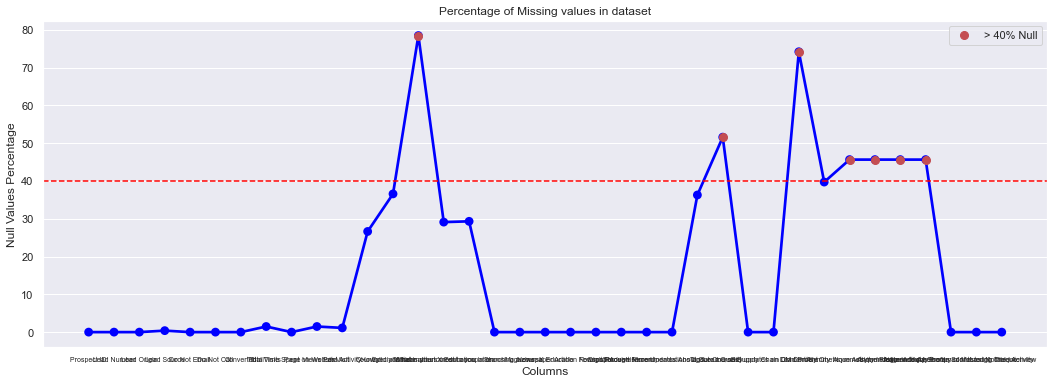

Features with more than 40% null values:
                           Column Name  Null Values Percentage
13  How did you hear about X Education               78.463203
25                        Lead Quality               51.590909
28                        Lead Profile               74.188312
30         Asymmetrique Activity Index               45.649351
31          Asymmetrique Profile Index               45.649351
32         Asymmetrique Activity Score               45.649351
33          Asymmetrique Profile Score               45.649351


In [12]:
null_data = pd.DataFrame((data.isnull().sum()) * 100 / data.shape[0]).reset_index()
null_data.columns = ['Column Name', 'Null Values Percentage']

# Filter features with more than 40% null values
high_null_features = null_data[null_data['Null Values Percentage'] > 40]

# Plotting
fig = plt.figure(figsize=(18, 6))
ax = sns.pointplot(x="Column Name", y="Null Values Percentage", data=null_data, color='blue')
plt.xticks(rotation=0, fontsize=7)

# Highlight the threshold line
ax.axhline(40, ls='--', color='red')

# Add red points for features with more than 40% null values
ax.plot(high_null_features.index, high_null_features['Null Values Percentage'], 'ro', markersize=8, label='> 40% Null')

plt.title("Percentage of Missing values in dataset")
plt.ylabel("Null Values Percentage")
plt.xlabel("Columns")
plt.legend()
plt.show()

# Print features with more than 40% null values
print("Features with more than 40% null values:")
print(high_null_features)

## Analyze & Delete Unnecessary Columns in lead dataset 

In [13]:
# dropping the columns with more than 40% null values
for i in data.columns:
    if 100*data[i].isnull().mean()>40:
        data.drop(i,1,inplace=True)

In [14]:
# Drop other columns
data.drop(columns=['City','Country','Tags', 'What matters most to you in choosing a course'],axis=1,inplace=True)

## Handling columns with only one unique value

In [17]:
Nunique = data.nunique().sort_values(ascending=True).reset_index()
cols_to_drop=Nunique[Nunique[0]==1]['index'].to_list()
cols_to_drop

['Receive More Updates About Our Courses',
 'I agree to pay the amount through cheque',
 'Magazine',
 'Get updates on DM Content',
 'Update me on Supply Chain Content']

In [18]:
print("Before Dropping Columns",data.shape)
data.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",data.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


# Null Value Data Imputation

In [19]:
# Columns to impute and their corresponding values
impute_mapping = {
    'Specialization': 'Others',
    'Lead Source': 'Google',
    'Last Activity': 'Email Opened',
    'What is your current occupation': 'Unemployed'
}

# Impute missing values based on the mapping
for column, value in impute_mapping.items():
    try:
        data[column].fillna(value, inplace=True)
    except KeyError:
        pass  # Ignore if the column is not found in the dataset

In [20]:
# The rest columns those have null values
Null = round(100*data.isnull().mean(),2).sort_values(ascending=False).reset_index()
Null[Null[0]>0]

,index,0
0,TotalVisits,1.48
1,Page Views Per Visit,1.48


In [21]:
# Columns and their corresponding imputation strategies
columns_to_impute = {
    'TotalVisits': 'median',
    'Page Views Per Visit': 'median'
}

# Impute missing values using a for loop
for column, strategy in columns_to_impute.items():
    try:
        if strategy == 'median':
            data[column].fillna(data[column].median(), inplace=True)
    except KeyError:
        pass  

In [22]:
data.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
data.shape

(9240, 18)

# Data attribute categorisation

In [23]:
categorical_features = ['Lead Origin', 'Lead Source',
                        'Do Not Email', 'Do Not Call', 'Last Activity',
                        'Specialization', 'What is your current occupation', 'Search',
                        'Newspaper Article', 'X Education Forums', 'Newspaper',
                        'Digital Advertisement', 'Through Recommendations',
                        'A free copy of Mastering The Interview']
numerical_features = ['Converted', 'TotalVisits',
                      'Total Time Spent on Website', 'Page Views Per Visit']
total_features = len(categorical_features + numerical_features)
total_features

18

## Checking and dropping category columns

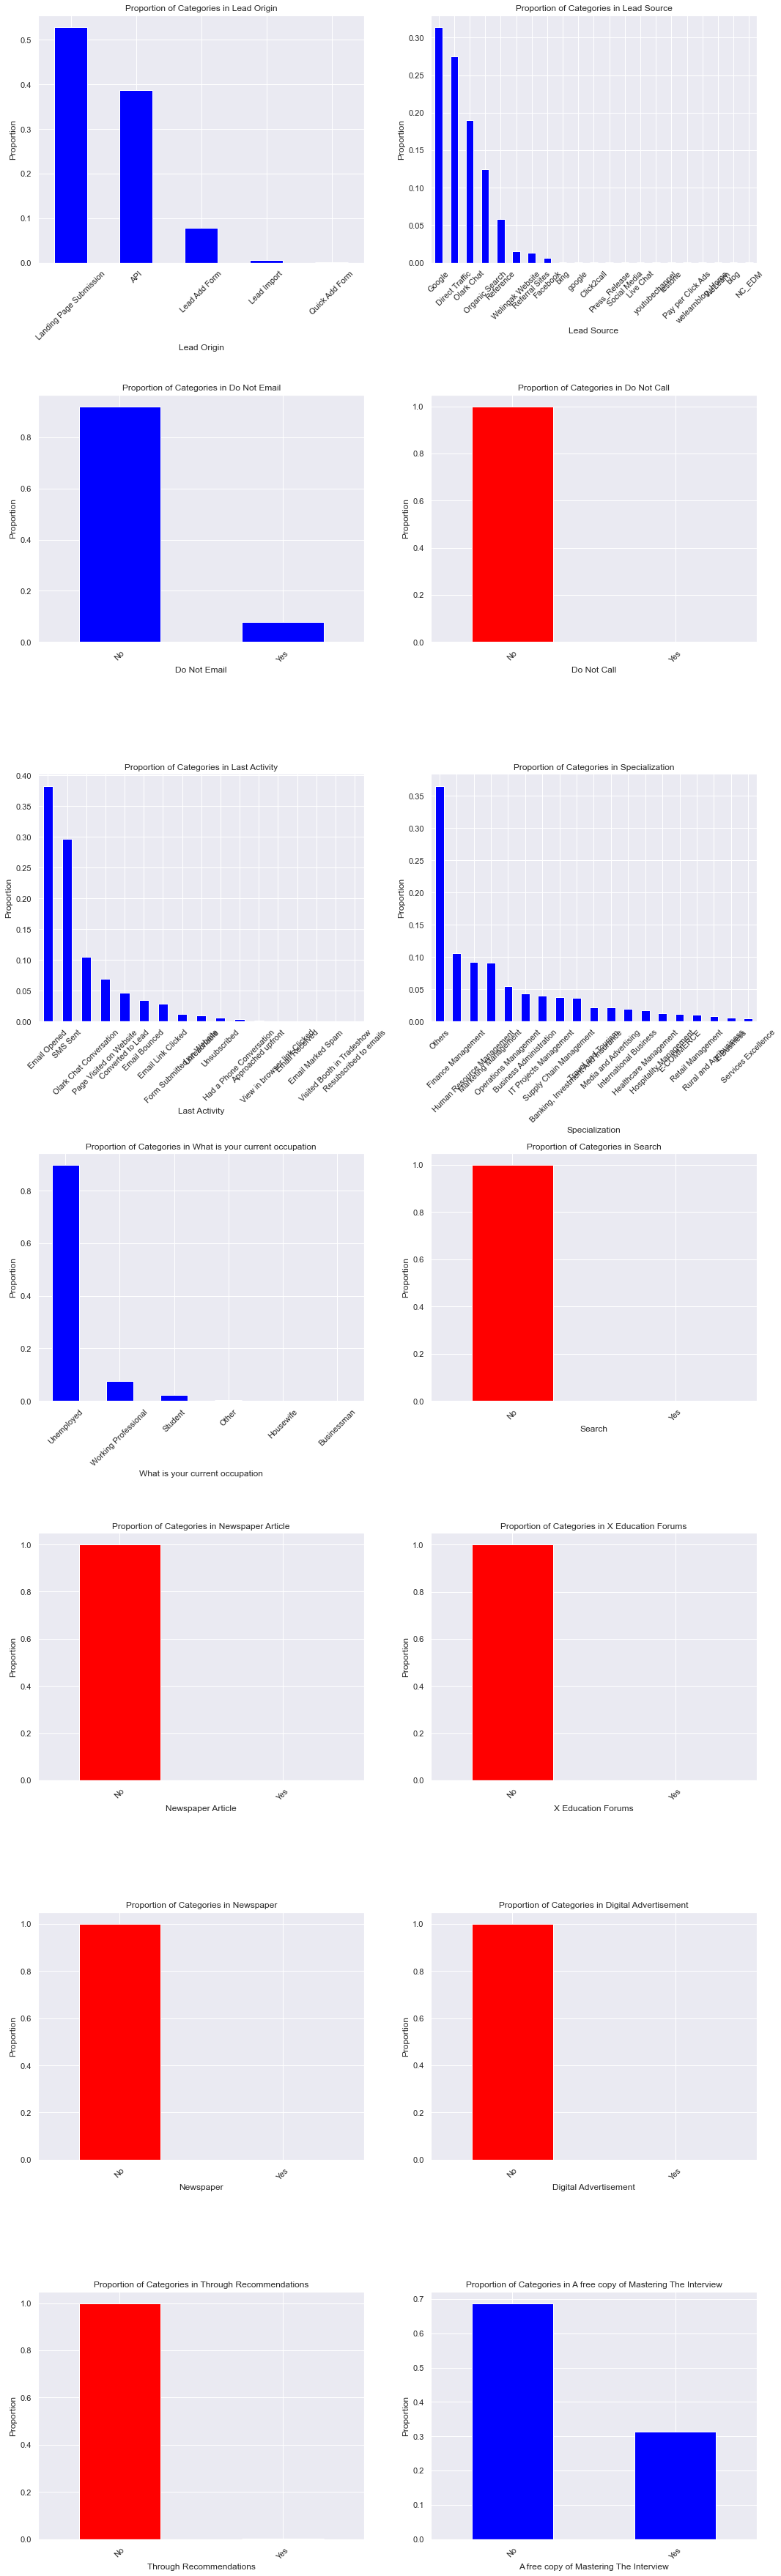

Skewed Categorical Features: ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']


In [24]:
import matplotlib.pyplot as plt

def plot_category_proportions(column_name, skewed):
    category_counts = data[column_name].value_counts(normalize=True)
    color = 'red' if skewed else 'blue'
    category_counts.plot(kind='bar', color=color)
    plt.title(f'Proportion of Categories in {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)

# Determine if each categorical feature is skewed
skewed_features = []
imbalanced_features = []
for column in categorical_features:
    category_counts = data[column].value_counts(normalize=True)
    most_common_category_proportion = category_counts.max()
    total_samples = len(data)
    imbalance_ratio = most_common_category_proportion / total_samples
    
    if most_common_category_proportion > 0.95: 
        skewed_features.append(column)
    
    if imbalance_ratio > 0.95:  
        imbalanced_features.append(column)

# Plot category proportions for each categorical feature
num_rows = (len(categorical_features) + 1) // 2
plt.figure(figsize=(15, 7 * num_rows))  
plot_index = 1

for column in categorical_features:
    plt.subplot(num_rows, 2, plot_index)
    is_skewed = column in skewed_features
    plot_category_proportions(column, is_skewed)
    plot_index += 1

plt.tight_layout()
plt.show()

# Print list of skewed categorical features
print("Skewed Categorical Features:", skewed_features)

In [25]:
skewed_features

['Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [26]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'], dtype='object')

In [27]:
data.drop([i for i in skewed_features],axis=1,inplace=True)

# Identifying the Outliers

Finding outlier information in lead data

In [29]:
numerical_features

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

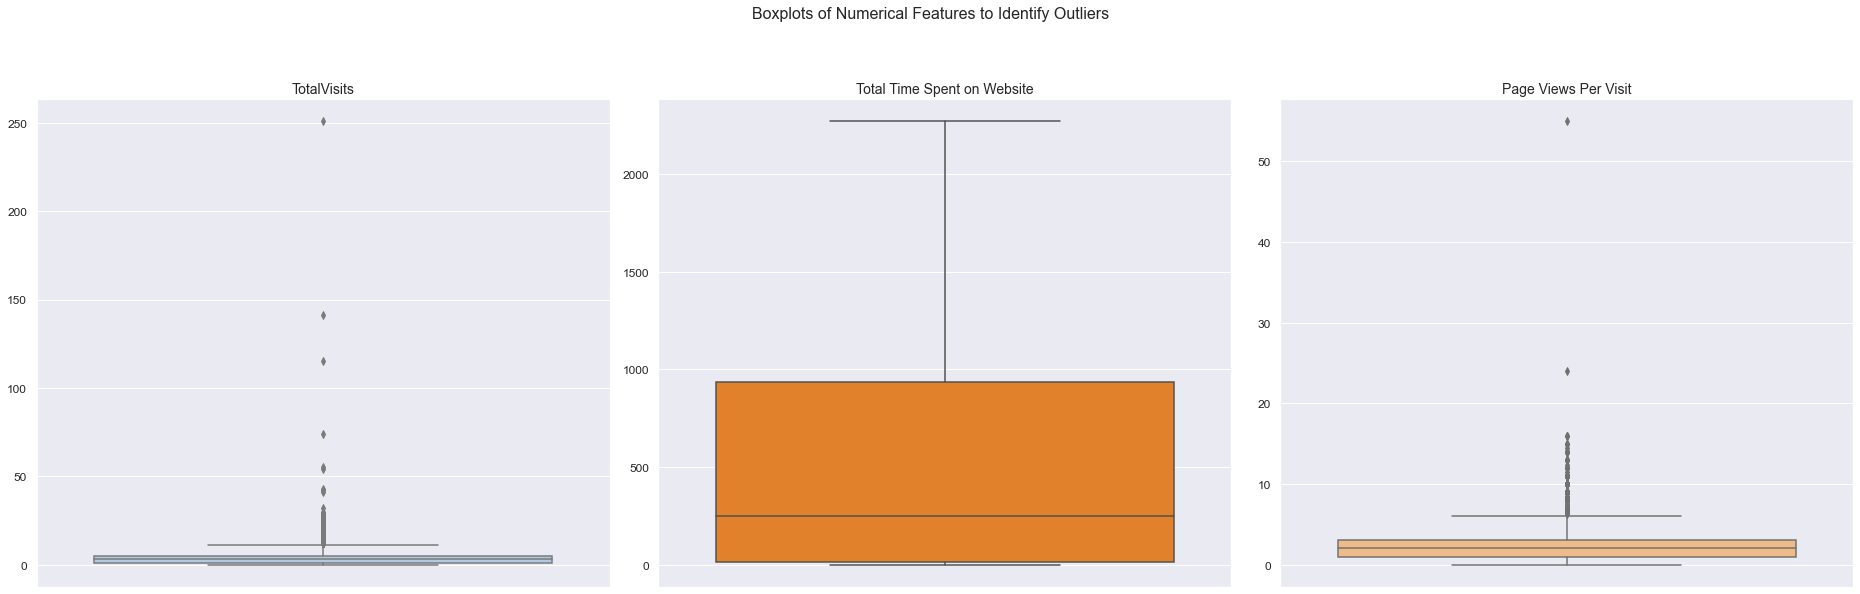

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color map with a variety of colors
colors = plt.cm.tab20.colors

plt.figure(figsize=(26, 16))

for i, col in enumerate(numerical_features[1:], 1):  # not including 'Converted' column
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col], color=colors[i])
    plt.title(col, fontsize=14)
    plt.ylabel("")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.suptitle("Boxplots of Numerical Features to Identify Outliers", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the position of the main title
plt.show()

In [31]:
# Calculate the IQR for each column
Q1 = data[numerical_features[1:]].quantile(0.25)
Q3 = data[numerical_features[1:]].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers
threshold = 1.5

# Identify outliers for each column
outliers = ((data[numerical_features[1:]] < (Q1 - threshold * IQR)) | (data[numerical_features[1:]] > (Q3 + threshold * IQR))).any()

# Print the columns with outliers
outlier_columns = outliers[outliers].index.tolist()
print("Columns with potential outliers:", outlier_columns)


Columns with potential outliers: ['TotalVisits', 'Page Views Per Visit']


In [32]:
# Treat outliers via capping and flooring
for feature in numerical_features[1:]:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    data[feature] = data[feature].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)


# Exploring Categorical Variables: Understanding Value Distribution and Data Quality 

In [33]:
# Define the list of categorical columns for analysis
columns_list_cat = ["Lead Origin", "Lead Source", "Do Not Email", "Last Activity",
                    "Specialization", "What is your current occupation", "A free copy of Mastering The Interview"]

# Iterate through the specified categorical columns
for column in columns_list_cat:
    value_counts = data[column].value_counts(normalize=True) * 100
    
    # Print the title with formatting
    print("=" * 40)
    print(f"Percentage Distribution for {column}:\n")
    print("-" * 40)
    
    # Print the value counts as percentages
    for category, percentage in value_counts.iteritems():
        print(f"{category}: {percentage:.2f}%")
    
    print("\n")

Percentage Distribution for Lead Origin:

----------------------------------------
Landing Page Submission: 52.88%
API: 38.74%
Lead Add Form: 7.77%
Lead Import: 0.60%
Quick Add Form: 0.01%


Percentage Distribution for Lead Source:

----------------------------------------
Google: 31.43%
Direct Traffic: 27.52%
Olark Chat: 18.99%
Organic Search: 12.49%
Reference: 5.78%
Welingak Website: 1.54%
Referral Sites: 1.35%
Facebook: 0.60%
bing: 0.06%
google: 0.05%
Click2call: 0.04%
Press_Release: 0.02%
Social Media: 0.02%
Live Chat: 0.02%
youtubechannel: 0.01%
testone: 0.01%
Pay per Click Ads: 0.01%
welearnblog_Home: 0.01%
WeLearn: 0.01%
blog: 0.01%
NC_EDM: 0.01%


Percentage Distribution for Do Not Email:

----------------------------------------
No: 92.06%
Yes: 7.94%


Percentage Distribution for Last Activity:

----------------------------------------
Email Opened: 38.31%
SMS Sent: 29.71%
Olark Chat Conversation: 10.53%
Page Visited on Website: 6.93%
Converted to Lead: 4.63%
Email Bounced: 3.

In [34]:
# Grouping infrequent lead sources into 'Others'
low_freq_sources = ['bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
                   'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
                   'WeLearn', 'blog', 'NC_EDM']

data['Lead Source'] = data['Lead Source'].replace(low_freq_sources, 'Others')

# Capitalizing the 1st character of the lead source
data['Lead Source'] = data['Lead Source'].str.capitalize()

In [35]:
# Grouping low-frequency value levels to Others in 'Last Activity' column
low_frequency_activities = ['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 
                            'Approached upfront', 'View in browser link Clicked',       
                            'Email Marked Spam', 'Email Received', 
                            'Visited Booth in Tradeshow', 'Resubscribed to emails']
data['Last Activity'] = data['Last Activity'].replace(low_frequency_activities, 'Others')

# Categorical Variables's Binary Mapping

In [36]:
# Mapping binary categorical variables (Yes/No to 1/0)
binary_columns = ['Do Not Email', 'A free copy of Mastering The Interview']

# Define a mapping function to convert 'Yes' to 1 and 'No' to 0
def map_binary_variable(x):
    return 1 if x == 'Yes' else 0

# Apply the mapping function to the specified columns
for column in binary_columns:
    data[column] = data[column].apply(map_binary_variable)


In [37]:
data['Total Time Spent on Website'] = data['Total Time Spent on Website'].astype(float)

In [38]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   float64
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

# Data Imbalance

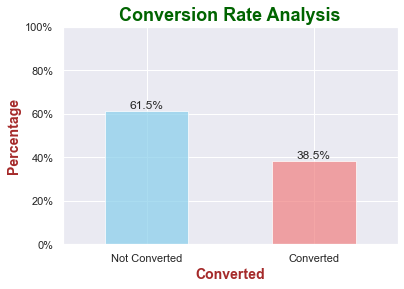

In [39]:
import matplotlib.pyplot as plt

# Calculate conversion percentages
conversion_percentages = 100 * data["Converted"].value_counts(normalize=True)

# Create a bar plot with custom colors
colors = ["SkyBlue", "LightCoral"]
ax = conversion_percentages.plot(kind="bar", color=colors, alpha=0.7)

# Customize plot appearance
plt.title("Conversion Rate Analysis", fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'DarkGreen'})
plt.xlabel('Converted', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'Brown'})
plt.ylabel("Percentage", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'Brown'})

# Modify y-axis ticks
ticks = range(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# Customize x-axis labels
plt.xticks([0, 1], ["Not Converted", "Converted"])
plt.xticks(rotation=0)

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

# Data Analysis

In [40]:
categorical_features = ["Lead Origin","What is your current occupation","Do Not Email",
            "A free copy of Mastering The Interview","Lead Source","Last Activity","Specialization"]

numerical_features = ["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

total_features = len(categorical_features + numerical_features)
total_features

11

## Univariate Analysis

Univariate analysis on numerical columns

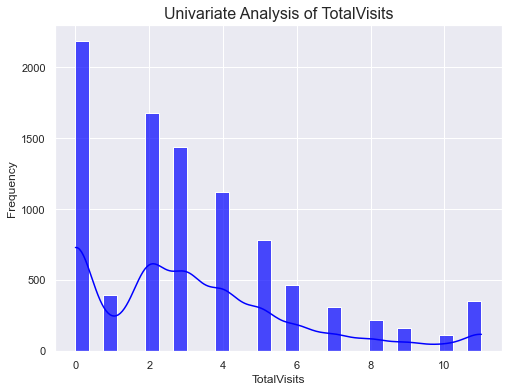

Insights for TotalVisits:
Mean: 3.22
Median: 3.00
Minimum: 0.00
Maximum: 11.00
_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_


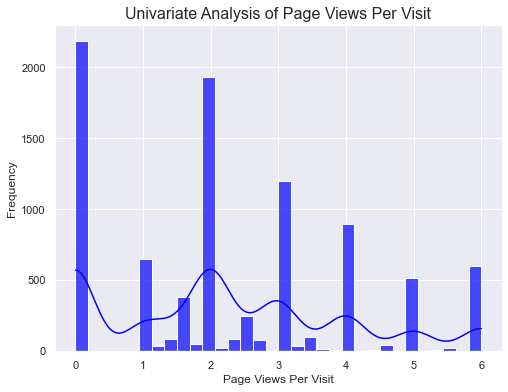

Insights for Page Views Per Visit:
Mean: 2.26
Median: 2.00
Minimum: 0.00
Maximum: 6.00
_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_


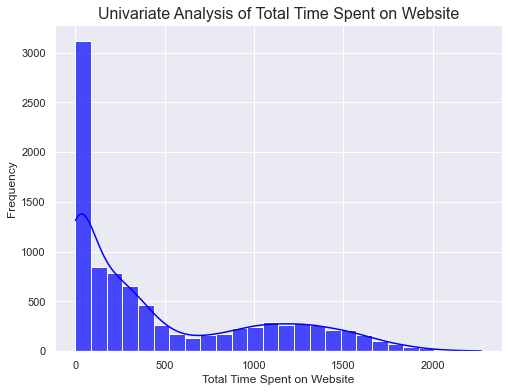

Insights for Total Time Spent on Website:
Mean: 487.70
Median: 248.00
Minimum: 0.00
Maximum: 2272.00
_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

# Loop through numerical columns for univariate analysis
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    
    # Plot a histogram
    sns.histplot(data[column], kde=True, color='blue', alpha=0.7)
    
    # Adding and formatting title
    plt.title(f'Univariate Analysis of {column}', fontsize=16)
    
    # Labeling axes
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Show the plot
    plt.show()

    # Calculate summary statistics
    mean_value = data[column].mean()
    median_value = data[column].median()
    min_value = data[column].min()
    max_value = data[column].max()

    # Display insights
    print(f"Insights for {column}:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Minimum: {min_value:.2f}")
    print(f"Maximum: {max_value:.2f}")
    print("_^_" * 30)

## Univariate analysis on Categorical columns

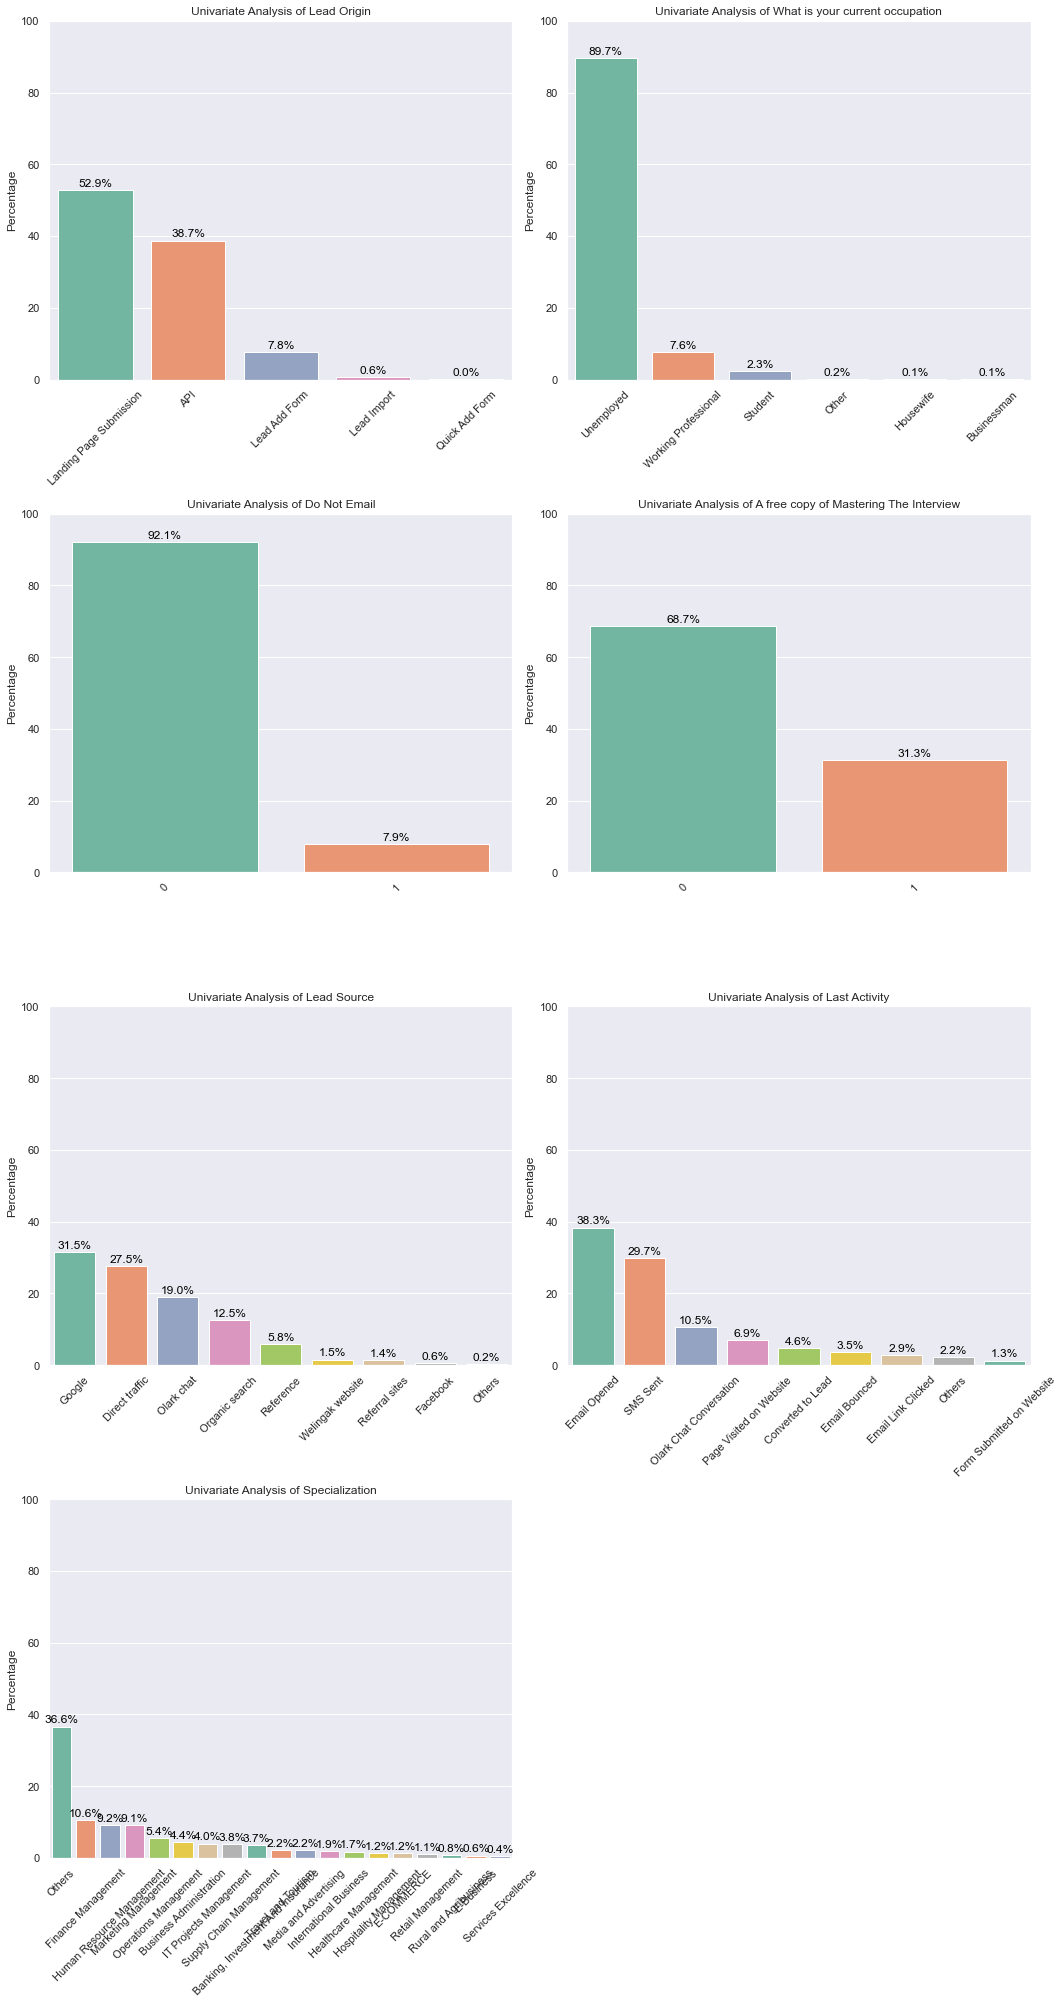

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns for Univariate Analysis
categorical_columns = ["Lead Origin", "What is your current occupation", "Do Not Email",
                       "A free copy of Mastering The Interview", "Lead Source",
                       "Last Activity", "Specialization"]

# Set up the subplots
num_rows = (len(categorical_columns) + 1) // 2
plt.figure(figsize=(15, 7 * num_rows))

# Iterate through each categorical column and create a bar plot
for index, column in enumerate(categorical_columns, start=1):
    plt.subplot(num_rows, 2, index)
    proportions = data[column].value_counts(normalize=True) * 100
    sns.barplot(x=proportions.index, y=proportions.values, palette='Set2')
    plt.title(f'Univariate Analysis of {column}', fontsize=12)
    plt.xticks(rotation=45)
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    
    for i, v in enumerate(proportions.values):
        plt.text(i, v + 1, f'{v:.1f}%', color='black', ha='center')

plt.tight_layout()
plt.show()

# Bivariate Analysis

## Bivariate analysis on numerical columns

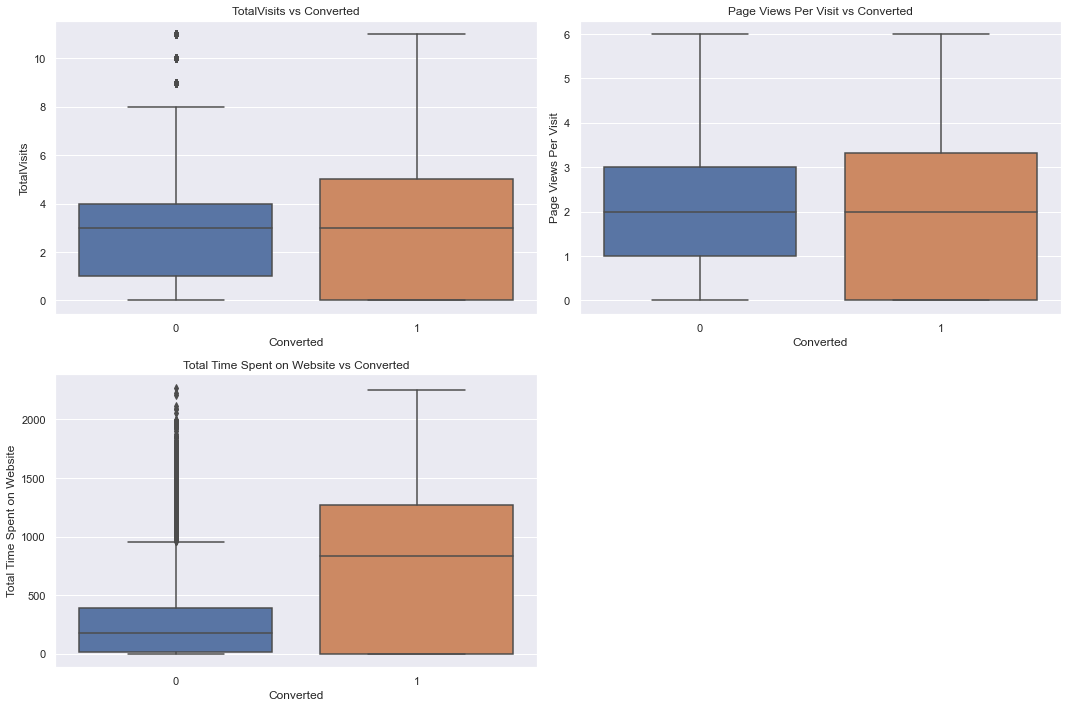

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bivariate Analysis on Numerical Columns with respect to 'Converted'
plt.figure(figsize=(15, 10))

# Subplot for 'TotalVisits'
plt.subplot(2, 2, 1)
sns.boxplot(x='Converted', y='TotalVisits', data=data)
plt.title("TotalVisits vs Converted")

# Subplot for 'Page Views Per Visit'
plt.subplot(2, 2, 2)
sns.boxplot(x='Converted', y='Page Views Per Visit', data=data)
plt.title("Page Views Per Visit vs Converted")

# Subplot for 'Total Time Spent on Website'
plt.subplot(2, 2, 3)
sns.boxplot(x='Converted', y='Total Time Spent on Website', data=data)
plt.title("Total Time Spent on Website vs Converted")

plt.tight_layout()
plt.show()

## Bivariate analysis on categorical columns

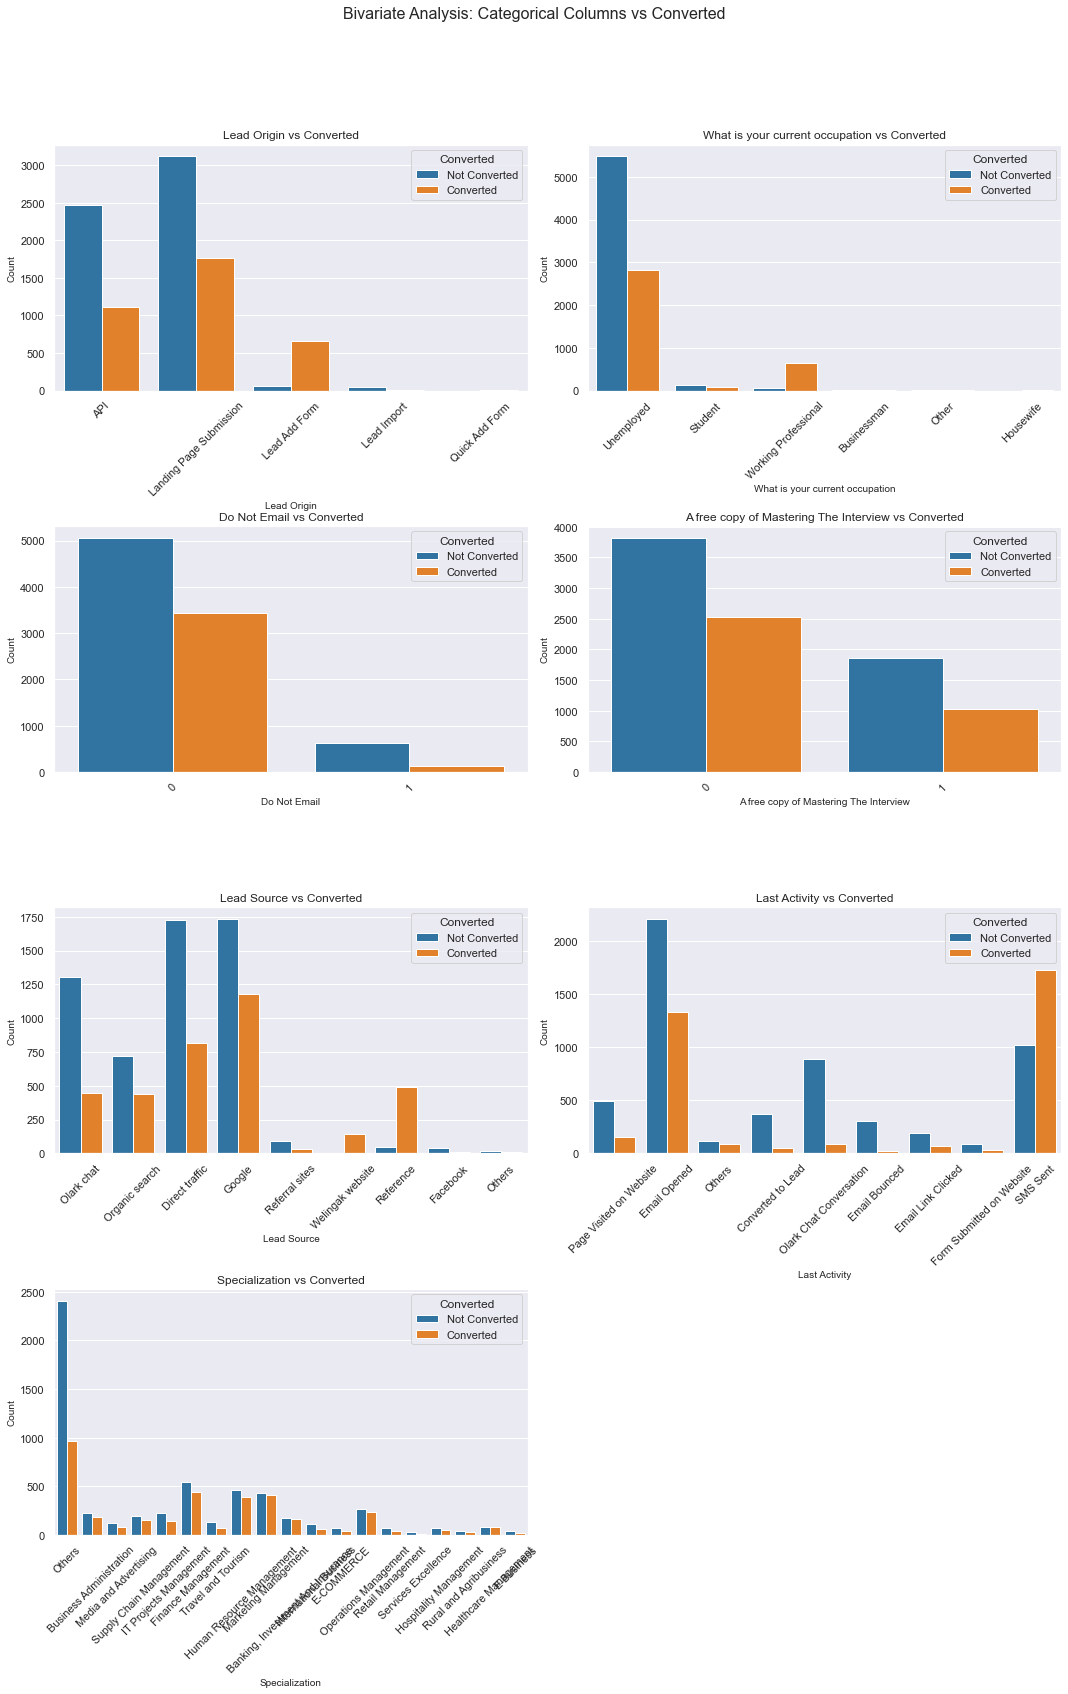

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns for analysis
categorical_columns = ["Lead Origin", "What is your current occupation", "Do Not Email",
                       "A free copy of Mastering The Interview", "Lead Source", "Last Activity", "Specialization"]

# Calculate number of rows and columns for subplots
num_rows = (len(categorical_columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
fig.suptitle("Bivariate Analysis: Categorical Columns vs Converted", fontsize=16)

# Loop through each categorical column and plot
for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Create a bar plot
    sns.countplot(x=column, hue="Converted", data=data, ax=ax, palette=["#1f77b4", "#ff7f0e"])
    
    # Add title and labels
    ax.set_title(f"{column} vs Converted", fontsize=12)
    ax.set_xlabel(column, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    
    # Customize legend
    ax.legend(title="Converted", loc='upper right', labels=["Not Converted", "Converted"])
    
    # Rotate x-axis labels if needed
    ax.tick_params(axis='x', rotation=45)

# Remove any extra subplot
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, num_cols - 1])

# Adjust layout and show the plots
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Multivariate Analysis

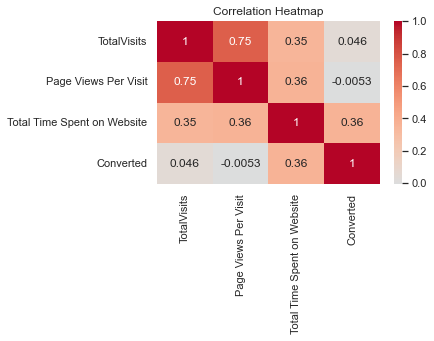

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for multivariate analysis
selected_columns = ["TotalVisits", "Page Views Per Visit", "Total Time Spent on Website", "Converted"]

# Create a new DataFrame with selected columns
selected_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Creating Dummy Variables

By creating dummy variables, we convert categorical variables into a binary numerical representation. Each category of the variable is transformed into a separate binary variable (0 or 1), making it easier for algorithms to process and interpret the data.

In [46]:
import pandas as pd

# Create a copy of the DataFrame with categorical columns
data_with_dummies = data.copy()

# List of categorical columns to create dummy variables for
categorical_columns = ["Lead Origin", "Lead Source","What is your current occupation", "Last Activity", "Specialization"]

# Create dummy variables for each categorical column
for column in categorical_columns:
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=True)
    data_with_dummies = pd.concat([data_with_dummies, dummies], axis=1)
    
# Drop the original categorical columns
data_with_dummies.drop(categorical_columns, axis=1, inplace=True)

# Display the first few rows of the DataFrame with dummy variables
print(data_with_dummies.head())

   Do Not Email  Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  A free copy of Mastering The Interview  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  Lead Source_Olark chat  Lead Source_Organic search  Lead Source_Others  Lead Source_Reference  Lead Source_Referral sites  Lead Source_Welingak website  What is your current occupation_Housewife  What is your current occupation_Other  What is your current occupation_Student  What is your current occupation_Unemployed  What is your current occupation_Working Professional  Last Activity_Email Bounced  Last Activity_Email Link Clicked  Last Activity_Email Opened  Last Activity_Form Submitted on Website  Last Activity_Olark Chat Conversation  Last Activity_Others  Last Activity_Page Visited on Website  Last Activity_SMS Sent  Specialization_Business Administration  Specialization_E-Business  Specializati

In [47]:
data_with_dummies.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Converted                                             9240 non-null   int64  
 2   TotalVisits                                           9240 non-null   float64
 3   Total Time Spent on Website                           9240 non-null   float64
 4   Page Views Per Visit                                  9240 non-null   float64
 5   A free copy of Mastering The Interview                9240 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 8   Lead Origin_Lead Import                               9240

In [48]:
data_with_dummies.shape

(9240, 49)

# Model Building

## Train_Test_Split

In [49]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data_with_dummies.drop("Converted", axis=1)
y = data_with_dummies["Converted"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=52)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7392, 48)
X_test shape: (1848, 48)
y_train shape: (7392,)
y_test shape: (1848,)


## Feature Scaling (Standardization)

In [50]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# List of numerical columns in your dataset
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform the scaler on the training data
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [51]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Welingak website,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
5888,0,2.0,45.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5275,0,2.0,1449.0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
579,0,11.0,99.0,6.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8198,0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5919,0,3.0,118.0,3.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Feature Selection

## Duplicate Feature Removal

In [52]:
# Identify duplicate columns
print("Number of Columns before removing duplicate columns- \n",X_train.shape[1])
duplicate_columns = X_train.columns[X_train.T.duplicated()]

# Display the list of duplicate columns
print("Duplicate Columns:", duplicate_columns.tolist())

# Drop duplicate columns from both training and test datasets
X_train = X_train.drop(columns=duplicate_columns)
X_test = X_test.drop(columns=duplicate_columns)

print("Number of Columns after removing duplicate columns- \n",X_train.shape[1])

Number of Columns before removing duplicate columns- 
 48
Duplicate Columns: []
Number of Columns after removing duplicate columns- 
 48


## Correlation analysis

In [53]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Find highly correlated features
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.85:  # adjust the correlation threshold as needed
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            highly_correlated.add((feature_i, feature_j, correlation_value))

# Print highly correlated features and their correlation values
for feature_i, feature_j, correlation_value in highly_correlated:
    print(f"Highly Correlated: {feature_i}, {feature_j}, Correlation: {correlation_value:.2f}")

Highly Correlated: Lead Source_Reference, Lead Origin_Lead Add Form, Correlation: 0.85
Highly Correlated: Lead Source_Facebook, Lead Origin_Lead Import, Correlation: 0.99


## Chi square test

In [54]:
import pandas as pd
from scipy.stats import chi2_contingency
column = ["What is your current occupation_Working Professional", "What is your current occupation_Unemployed"]
for feature in column:

    # Create a contingency table
    contingency_table = pd.crosstab(data_with_dummies[feature], data_with_dummies["Converted"], margins=True)
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Define a significance level
    alpha = 0.05

    # Determine if the columns are essential based on the p-value
    if p < alpha:
        print(feature, ": The columns are essential for predicting the target.")
    else:
        print(feature, ": The columns are not essential for predicting the target.")

What is your current occupation_Working Professional : The columns are essential for predicting the target.
What is your current occupation_Unemployed : The columns are essential for predicting the target.


In [55]:
# Drop the highly correlated columns from both training and testing datasets
columns_to_drop = ['Lead Origin_Lead Import','Lead Origin_Lead Add Form']
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

# Feature Selection using VIF and p-values

In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression()

# Create RFE model with the desired number of features to select

rfe = RFE(logreg, n_features_to_select=15)

# Fit the RFE model on the training data
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [57]:
# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark chat', 'Lead Source_Reference', 'Lead Source_Welingak website', 'What is your current occupation_Housewife', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Others'], dtype='object')


In [58]:
a = list(set(X_train.columns.to_list()).difference(set(selected_features)))
print(a)

['Specialization_Media and Advertising', 'Specialization_Supply Chain Management', 'Specialization_Travel and Tourism', 'Specialization_Finance Management', 'Lead Source_Referral sites', 'Specialization_Business Administration', 'Specialization_Rural and Agribusiness', 'Lead Source_Organic search', 'Specialization_Human Resource Management', 'Do Not Email', 'Lead Source_Google', 'Specialization_Marketing Management', 'Specialization_Hospitality Management', 'Specialization_IT Projects Management', 'Lead Source_Others', 'Specialization_Operations Management', 'Last Activity_Olark Chat Conversation', 'Lead Origin_Quick Add Form', 'What is your current occupation_Other', 'Specialization_Services Excellence', 'Specialization_Healthcare Management', 'Last Activity_Email Bounced', 'Specialization_International Business', 'Last Activity_Form Submitted on Website', 'Specialization_E-Business', 'TotalVisits', 'A free copy of Mastering The Interview', 'Lead Source_Facebook', 'Page Views Per Visi

In [59]:
print(len(X_train.columns.to_list()))

46


In [60]:
print(len(a), len(selected_features))
print(len(a)+ len(selected_features))

31 15
46


In [61]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Features"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    vif_data["VIF"] = round(vif_data["VIF"], 2)
    vif_data = vif_data.sort_values(by="VIF", ascending=False)
    vif_data = vif_data.reset_index(drop=True)
    return vif_data

# -------------Model 1--------------

In [62]:
import statsmodels.api as sm


# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]

# Adding a constant variable
X_train_sm = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.6
Date:                Tue, 22 Aug 2023   Deviance:                       6333.2
Time:                        20:20:03   Pearson chi2:                 8.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3806
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [63]:
calculate_vif(X_train_rfe)

,Features,VIF
0,What is your current occupation_Unemployed,15.33
1,Lead Origin_Landing Page Submission,6.85
2,Specialization_Others,4.50
3,Last Activity_Email Opened,3.06
4,Last Activity_SMS Sent,2.74
5,Lead Source_Olark chat,2.16
6,What is your current occupation_Working Profes...,2.07
7,Lead Source_Reference,1.56
8,Last Activity_Page Visited on Website,1.42
9,What is your current occupation_Student,1.38


In [64]:
# Drop the 'What is your current occupation_Unemployed' column
selected_features=selected_features.drop('What is your current occupation_Unemployed')

# ----------Model 2----------

In [65]:
# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]
# Adding a constant variable
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3168.5
Date:                Tue, 22 Aug 2023   Deviance:                       6337.0
Time:                        20:21:44   Pearson chi2:                 8.57e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3803
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [66]:
calculate_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.78
1,Last Activity_Email Opened,2.31
2,Specialization_Others,2.30
3,Last Activity_SMS Sent,2.17
4,Lead Source_Olark chat,1.88
5,Lead Source_Reference,1.35
6,Last Activity_Page Visited on Website,1.27
7,Total Time Spent on Website,1.24
8,What is your current occupation_Working Profes...,1.21
9,Lead Source_Welingak website,1.10


In [67]:
# DROP THE What is your current occupation_Housewife COLUMN
selected_features=selected_features.drop('What is your current occupation_Housewife')

# ------------Model 3------------

In [68]:
# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]

# Adding a constant variable
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3176.3
Date:                Tue, 22 Aug 2023   Deviance:                       6352.6
Time:                        20:22:55   Pearson chi2:                 8.59e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3790
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [69]:
calculate_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.78
1,Last Activity_Email Opened,2.31
2,Specialization_Others,2.30
3,Last Activity_SMS Sent,2.17
4,Lead Source_Olark chat,1.88
5,Lead Source_Reference,1.35
6,Last Activity_Page Visited on Website,1.27
7,Total Time Spent on Website,1.24
8,What is your current occupation_Working Profes...,1.20
9,Lead Source_Welingak website,1.10


# -------------Model 4-----------

In [70]:
# Convert the Index to a list
selected_features = list(selected_features)

# Add 'Lead Source_Google' to the list
selected_features.append('Lead Source_Google')

# Convert the list back to a pandas Index
selected_features = pd.Index(selected_features)
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark chat', 'Lead Source_Reference', 'Lead Source_Welingak website', 'What is your current occupation_Student', 'What is your current occupation_Working Professional', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Others', 'Lead Source_Google'], dtype='object')

In [71]:
# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]
# Adding a constant variable
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.4
Date:                Tue, 22 Aug 2023   Deviance:                       6332.9
Time:                        20:26:45   Pearson chi2:                 8.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3806
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [72]:
calculate_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.82
1,Specialization_Others,2.52
2,Last Activity_Email Opened,2.43
3,Last Activity_SMS Sent,2.26
4,Lead Source_Olark chat,2.06
5,Lead Source_Google,1.65
6,Lead Source_Reference,1.38
7,Last Activity_Page Visited on Website,1.28
8,Total Time Spent on Website,1.25
9,What is your current occupation_Working Profes...,1.21


# ------------Model 5-----------

In [73]:
# Convert the Index to a list
selected_features = list(selected_features)

# Add 'Do Not Email' to the list
selected_features.append('Do Not Email')

# Convert the list back to a pandas Index
selected_features = pd.Index(selected_features)
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark chat', 'Lead Source_Reference', 'Lead Source_Welingak website', 'What is your current occupation_Student', 'What is your current occupation_Working Professional', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Others', 'Lead Source_Google', 'Do Not Email'], dtype='object')

In [74]:
# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]

# Adding a constant variable
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3144.9
Date:                Tue, 22 Aug 2023   Deviance:                       6289.7
Time:                        20:28:57   Pearson chi2:                 8.61e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3843
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [75]:
calculate_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.97
1,Last Activity_Email Opened,2.59
2,Specialization_Others,2.55
3,Last Activity_SMS Sent,2.30
4,Lead Source_Olark chat,2.06
5,Lead Source_Google,1.66
6,Lead Source_Reference,1.38
7,Last Activity_Page Visited on Website,1.28
8,Total Time Spent on Website,1.25
9,What is your current occupation_Working Profes...,1.21


# ------------Model 6---------

In [76]:
# Convert the Index to a list
selected_features = list(selected_features)

# Add 'TotalVisits' to the list
selected_features.append('TotalVisits')

# Convert the list back to a pandas Index
selected_features = pd.Index(selected_features)
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark chat', 'Lead Source_Reference', 'Lead Source_Welingak website', 'What is your current occupation_Student', 'What is your current occupation_Working Professional', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Others', 'Lead Source_Google', 'Do Not Email', 'TotalVisits'], dtype='object')

In [77]:
# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]

# Adding a constant variable
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model6 = sm.GLM(y_train, X_train_sm6, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3140.2
Date:                Tue, 22 Aug 2023   Deviance:                       6280.4
Time:                        20:29:57   Pearson chi2:                 8.71e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3850
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [78]:
calculate_vif(X_train_rfe)

,Features,VIF
0,Lead Origin_Landing Page Submission,2.97
1,Last Activity_Email Opened,2.66
2,Specialization_Others,2.58
3,Lead Source_Olark chat,2.33
4,Last Activity_SMS Sent,2.33
5,TotalVisits,1.68
6,Lead Source_Google,1.66
7,Lead Source_Reference,1.49
8,Last Activity_Page Visited on Website,1.38
9,Total Time Spent on Website,1.27


# -------------Model 7------------

In [79]:
# Convert the Index to a list
selected_features = list(selected_features)

# Add 'Lead Source_Google' to the list
selected_features.append('Page Views Per Visit')

# Convert the list back to a pandas Index
selected_features = pd.Index(selected_features)
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark chat', 'Lead Source_Reference', 'Lead Source_Welingak website', 'What is your current occupation_Student', 'What is your current occupation_Working Professional', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Others', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Specialization_Others', 'Lead Source_Google', 'Do Not Email', 'TotalVisits', 'Page Views Per Visit'], dtype='object')

In [80]:
# Creating X_train dataframe with selected features
X_train_rfe = X_train[selected_features]

# Adding a constant variable
X_train_sm7 = sm.add_constant(X_train_rfe)

# Create a logistic regression model
log_model7 = sm.GLM(y_train, X_train_sm7, family=sm.families.Binomial()).fit()

# Display the summary of the logistic regression model
print(log_model7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3122.1
Date:                Tue, 22 Aug 2023   Deviance:                       6244.2
Time:                        20:31:20   Pearson chi2:                 8.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [81]:
calculate_vif(X_train_rfe)

,Features,VIF
0,Page Views Per Visit,3.13
1,Lead Origin_Landing Page Submission,3.03
2,Last Activity_Email Opened,2.68
3,Specialization_Others,2.59
4,Lead Source_Olark chat,2.57
5,TotalVisits,2.57
6,Last Activity_SMS Sent,2.35
7,Lead Source_Google,1.66
8,Lead Source_Reference,1.57
9,Last Activity_Page Visited on Website,1.38


## Final model

After thorough feature selection and model evaluation, the logistic regression model log_model7 stands out as the most suitable for predicting conversion rates. This final model includes a combination of carefully chosen features, resulting in improved performance metrics and enhanced explanatory power compared to previous iterations.

The Pseudo R-squared value has consistently increased across various model iterations, reaching its highest value of 0.3880 in log_model7. Additionally, the AIC and BIC values have progressively decreased, indicating a better fit of the model to the data and a favorable trade-off between model fit and complexity.

With the current model log_model7, we have taken a systematic approach to feature selection and optimization, resulting in a model that provides valuable insights into potential leads' conversion behavior. This final model can be confidently used for making informed marketing and sales decisions to maximize conversion rates.

# Prediction on training samples

In [82]:
# Getting the predicted values on the train set
y_train_pred = log_model7.predict(X_train_sm7)

# Displaying the first 10 predicted values
print(y_train_pred[:10])

466     0.393073
7039    0.985824
8118    0.953119
3235    0.246384
4510    0.172510
3507    0.130786
5844    0.530926
3636    0.057600
8684    0.924365
3710    0.860688
dtype: float64


In [83]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.39307266, 0.98582379, 0.95311864, 0.24638394, 0.17251032,
       0.13078646, 0.5309257 , 0.05759963, 0.92436549, 0.86068808])

In [84]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.393073,466
1,1,0.985824,7039
2,1,0.953119,8118
3,0,0.246384,3235
4,0,0.172510,4510


In [85]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,1,0.393073,466,0
1,1,0.985824,7039,1
2,1,0.953119,8118,1
3,0,0.246384,3235,0
4,0,0.172510,4510,0


## Confusion matrix

In [86]:
# Confusion matrix  (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[4031  492]
 [ 950 1919]]


## Check accuracy

In [87]:
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8049242424242424


## Sensitivity and Specificity

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))
# positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))

Sensitivity : 0.6688741721854304
Specificity : 0.8912226398408136
0.10877736015918638
0.795935296557445
0.8092752459345512


## Plotting the ROC Curve

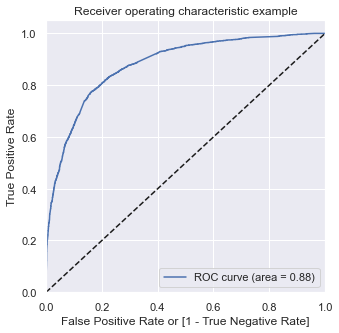

In [89]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False )

# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

## Finding Optimal Cutoff Point/ Probability 

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.393073,466,0,1,1,1,1,0,0,0,0,0,0
1,1,0.985824,7039,1,1,1,1,1,1,1,1,1,1,1
2,1,0.953119,8118,1,1,1,1,1,1,1,1,1,1,1
3,0,0.246384,3235,0,1,1,1,0,0,0,0,0,0,0
4,0,0.172510,4510,0,1,1,0,0,0,0,0,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388122  1.000000  0.000000
0.1   0.1  0.593615  0.973858  0.352421
0.2   0.2  0.724702  0.926107  0.596949
0.3   0.3  0.793155  0.837226  0.765200
0.4   0.4  0.812635  0.774486  0.836834
0.5   0.5  0.804924  0.668874  0.891223
0.6   0.6  0.794102  0.596375  0.919522
0.7   0.7  0.775568  0.510282  0.943843
0.8   0.8  0.754058  0.414082  0.969710
0.9   0.9  0.705357  0.255490  0.990714


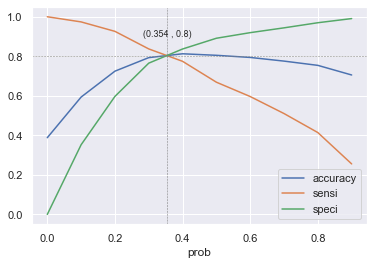

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)
# Displaying the plot
plt.show()

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.354 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,1,0.393073,466,1
1,1,0.985824,7039,1
2,1,0.953119,8118,1
3,0,0.246384,3235,0
4,0,0.172510,4510,0


## Calculating all metrics using confusion matrix for Train

In [94]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

0.8035714285714286


In [95]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))
    
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("__^__"*10,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("__^__"*10,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("__^__"*10,"\n")

__^____^____^____^____^____^____^____^____^____^__ 

Confusion Matrix
[[3639  884]
 [ 568 2301]] 

__^____^____^____^____^____^____^____^____^____^__ 

True Negative                    :  3639
True Positive                    :  2301
False Negative                   :  568
False Positve                    :  884
Model Accuracy                   :  0.8036
Model Sensitivity                :  0.802
Model Specificity                :  0.8046
Model Precision                  :  0.7224
Model Recall                     :  0.802
Model True Positive Rate (TPR)   :  0.802
Model False Positive Rate (FPR)  :  0.1954


__^____^____^____^____^____^____^____^____^____^__ 



## Precision and recall tradeoff

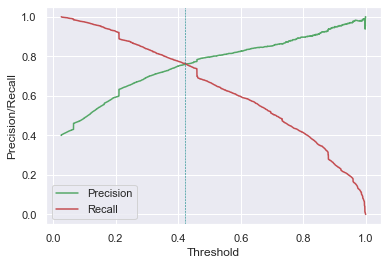

In [96]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.423, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [97]:
# copying df to test model evaluation with precision recall threshold of 0.423
y_train_precision_recall = y_train_pred_final.copy()
# assigning a feature for 0.423 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.423 else 0)
## Lets see all matrics at 0.423 cutoff in precision-recall view and compare it with 0.354 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("__^__"*10,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("__^__"*10,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("__^__"*10,"\n")

__^____^____^____^____^____^____^____^____^____^__ 

Confusion Matrix
[[3830  693]
 [ 681 2188]] 

__^____^____^____^____^____^____^____^____^____^__ 

True Negative                    :  3830
True Positive                    :  2188
False Negative                   :  681
False Positve                    :  693
Model Accuracy                   :  0.8141
Model Sensitivity                :  0.7626
Model Specificity                :  0.8468
Model Precision                  :  0.7595
Model Recall                     :  0.7626
Model True Positive Rate (TPR)   :  0.7626
Model False Positive Rate (FPR)  :  0.1532


__^____^____^____^____^____^____^____^____^____^__ 



## Adding Lead Score Feature to Training dataframe

In [98]:
# Lets add Lead Score 
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,1,0.393073,466,1,39
1,1,0.985824,7039,1,99
2,1,0.953119,8118,1,95
3,0,0.246384,3235,0,25
4,0,0.172510,4510,0,17


# Model Evalution

## Making Predictions on test set 

Scaling Test dataset 

In [99]:
# fetching int64 and float64 dtype columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[selected_features]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark chat,Lead Source_Reference,Lead Source_Welingak website,What is your current occupation_Student,What is your current occupation_Working Professional,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Others,Lead Source_Google,Do Not Email,TotalVisits,Page Views Per Visit
5888,-0.807876,1,0,0,0,0,0,0,1,0,0,0,0,0,-0.29668,-0.424581,-0.141621
5275,1.765112,1,0,0,0,0,0,0,0,0,0,1,0,0,-0.29668,-0.424581,-0.141621
579,-0.708915,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.29668,2.710092,2.104644
8198,-0.890344,0,0,1,0,0,0,0,0,0,0,1,1,0,-0.29668,-1.121175,-1.264753
5919,-0.674096,1,0,0,0,0,0,0,1,0,0,0,0,1,-0.29668,-0.076284,0.419945


 Prediction on Test Dataset using final model

In [100]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(1848, 18)

In [101]:
# making prediction using model 7 (final model)
y_test_pred = log_model7.predict(X_test_sm)

In [102]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,5888,0,0.094807
1,5275,1,0.827978
2,579,0,0.032493
3,8198,0,0.879363
4,5919,0,0.132677


In [103]:
# taking sensitivity-specificity method at 0.354 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.354 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,5888,0,0.094807,0
1,5275,1,0.827978,1
2,579,0,0.032493,0
3,8198,0,0.879363,1
4,5919,0,0.132677,0


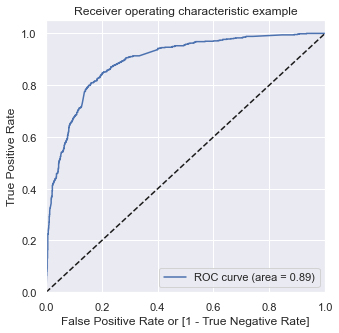

In [104]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

In [105]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("__^__"*10,"\n")

print("Confusion Matrix")
print(confusion_matrix,"\n")

print("__^__"*10,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("__^__"*10,"\n")

__^____^____^____^____^____^____^____^____^____^__ 

Confusion Matrix
[[927 229]
 [111 581]] 

__^____^____^____^____^____^____^____^____^____^__ 

True Negative                    :  927
True Positive                    :  581
False Negative                   :  111
False Positve                    :  229
Model Accuracy                   :  0.816
Model Sensitivity                :  0.8396
Model Specificity                :  0.8019
Model Precision                  :  0.7173
Model Recall                     :  0.8396
Model True Positive Rate (TPR)   :  0.8396
Model False Positive Rate (FPR)  :  0.1981


__^____^____^____^____^____^____^____^____^____^__ 



Equation for the best-fitted line: 

In [106]:
# Get the coefficients and intercept
coefficients = log_model7.params[1:]  # Exclude the intercept
intercept = log_model7.params[0]  # Intercept term
# intercept = lm13.params['const']  # or Intercept term

# Create a list of feature names
feature_names = X_train_rfe

# Create the equation string
equation = f"cnt = {intercept:.4f}"
for feature, coefficient in zip(feature_names, coefficients):
    equation += f" + ({coefficient:.4f} * {feature})"
    
print("Equation for the best-fitted line:")
print(equation)

Equation for the best-fitted line:
cnt = -1.6574 + (1.0368 * Total Time Spent on Website) + (-1.1020 * Lead Origin_Landing Page Submission) + (0.9221 * Lead Source_Olark chat) + (3.0691 * Lead Source_Reference) + (6.4846 * Lead Source_Welingak website) + (0.4529 * What is your current occupation_Student) + (2.6027 * What is your current occupation_Working Professional) + (1.0302 * Last Activity_Email Link Clicked) + (1.3394 * Last Activity_Email Opened) + (1.6597 * Last Activity_Others) + (0.6547 * Last Activity_Page Visited on Website) + (2.4994 * Last Activity_SMS Sent) + (-1.1690 * Specialization_Others) + (0.3231 * Lead Source_Google) + (-0.2586 * Do Not Email) + (0.2862 * TotalVisits) + (-0.3254 * Page Views Per Visit)


# Conclusion

Model Summary:
The generalized linear model (GLM) was employed to predict conversion likelihood based on the provided features. The model exhibited a pseudo R-squared value of 0.3880, indicating that approximately 38.80% of the variance in the target variable could be explained by the selected features.

The model's coefficients provide insights into the impact of each predictor variable on the likelihood of conversion:

1. Lead Origin: The coefficient for 'Landing Page Submission' is -1.1020, suggesting that leads originating from landing page submissions are less likely to convert compared to other lead origins.
2. Lead Source: Positive coefficients for 'Olark chat,' 'Reference,' and 'Welingak website' indicate that leads from these sources have a higher likelihood of conversion.
3. Current Occupation: The coefficient for 'Working Professional' is 2.6027, indicating that individuals with a 'Working Professional' occupation are more likely to convert.
4. Last Activity: Positive coefficients for 'Email Link Clicked,' 'Email Opened,' 'Others,' 'Page Visited on Website,' and 'SMS Sent' suggest that these last activities positively influence the conversion likelihood.
5. Specialization: The coefficient for 'Others' is -1.1690, implying that leads with 'Other Specialization' are less likely to convert compared to other specialization categories.
6. Do Not Email: The negative coefficient of -0.2586 suggests that leads who did not opt for email communication are less likely to convert.
7. TotalVisits: The coefficient of 0.2862 indicates that an increase in the number of total visits positively affects conversion likelihood.
8. Page Views Per Visit: The coefficient of -0.3254 suggests that higher page views per visit have a negative impact on conversion likelihood.